# 1:

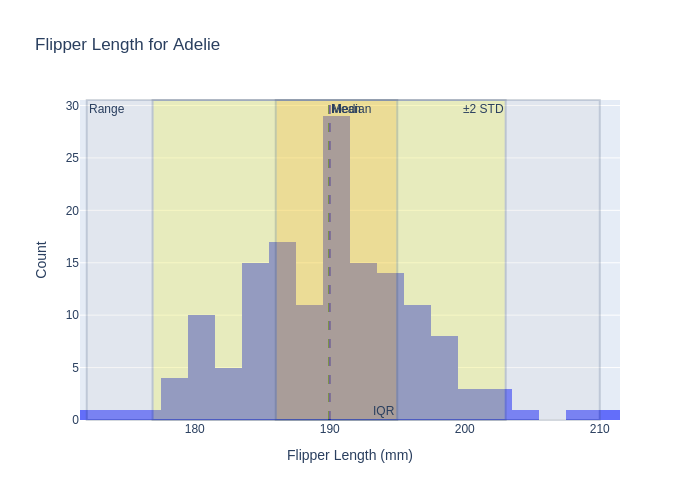

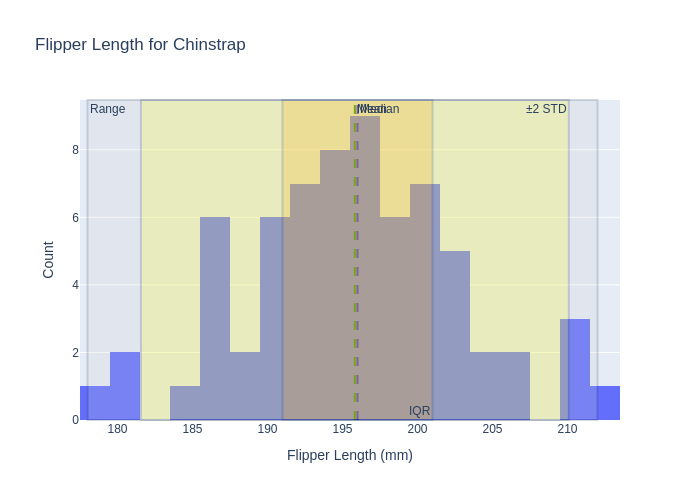

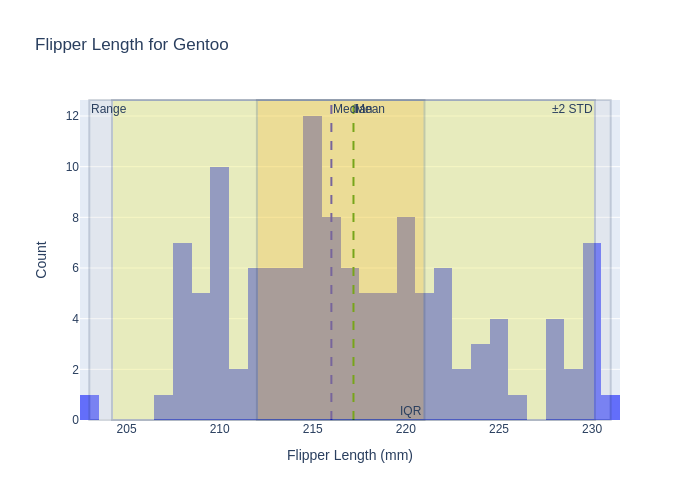

In [9]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Load the dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Remove rows with missing values in 'flipper_length_mm'
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Function to create a histogram with markings for a given species
def create_histogram(species_name, df):
    # Filter for the species
    species_data = df[df['species'] == species_name]
    
    # Calculate statistics
    flipper_length = species_data['flipper_length_mm']
    mean = flipper_length.mean()
    median = flipper_length.median()
    min_val = flipper_length.min()
    max_val = flipper_length.max()
    q1 = flipper_length.quantile(0.25)
    q3 = flipper_length.quantile(0.75)
    iqr = q3 - q1
    std = flipper_length.std()
    
    # Create histogram
    fig = px.histogram(species_data, x='flipper_length_mm', nbins=30, title=f'Flipper Length for {species_name}')
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line=dict(color='green', dash='dash'), annotation_text='Mean', annotation_position="top right")
    fig.add_vline(x=median, line=dict(color='blue', dash='dash'), annotation_text='Median', annotation_position="top right")
    
    # Add horizontal range lines (scale)
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor="lightgray", opacity=0.2, annotation_text="Range", annotation_position="top left")
    fig.add_vrect(x0=mean-2*std, x1=mean+2*std, fillcolor="yellow", opacity=0.2, annotation_text="±2 STD", annotation_position="top right")
    fig.add_vrect(x0=q1, x1=q3, fillcolor="orange", opacity=0.2, annotation_text="IQR", annotation_position="bottom right")
    
    fig.update_layout(xaxis_title="Flipper Length (mm)", yaxis_title="Count")
    
    return fig

# Create a histogram for each species
species_list = penguins['species'].unique()

for species in species_list:
    fig = create_histogram(species, penguins)
    fig.show(renderer="png")


# 2:

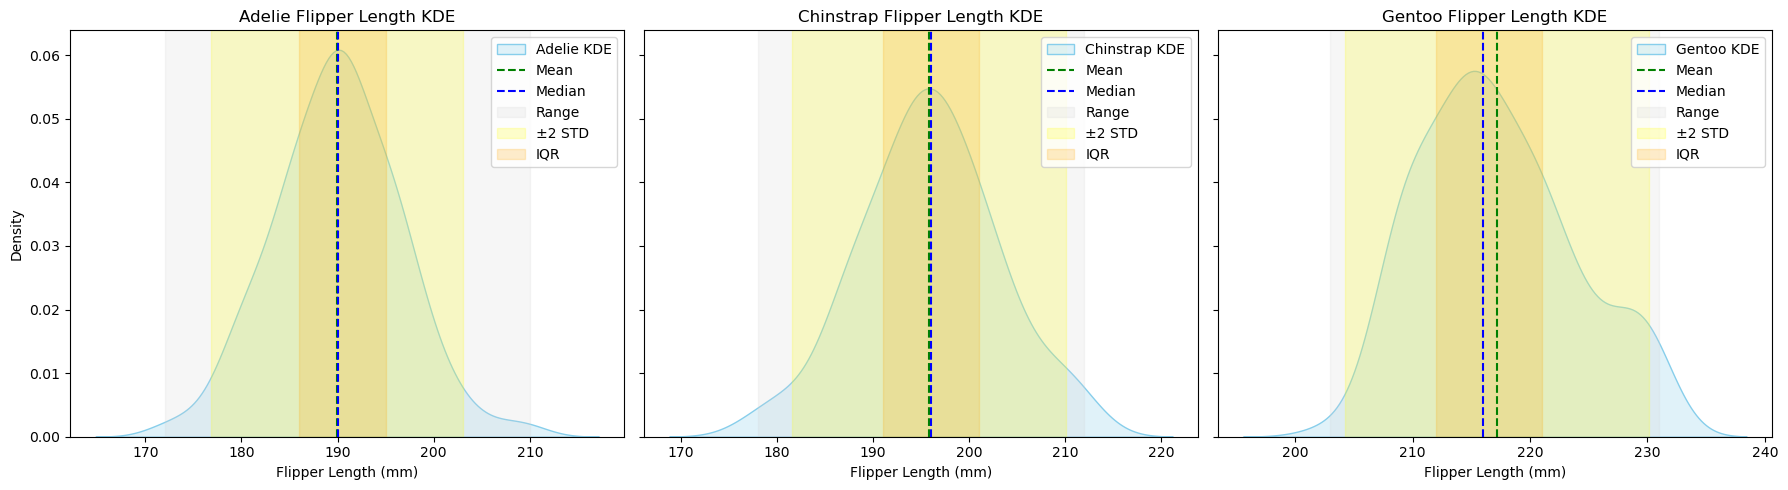

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Remove rows with missing values in 'flipper_length_mm'
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Function to create KDE plot with markings for a given species
def create_kde_plot(ax, species_name, df):
    # Filter data for the species
    species_data = df[df['species'] == species_name]['flipper_length_mm']
    
    # Calculate statistics
    mean = species_data.mean()
    median = species_data.median()
    min_val = species_data.min()
    max_val = species_data.max()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    iqr = q3 - q1
    std = species_data.std()
    
    # Create KDE plot
    sns.kdeplot(species_data, ax=ax, fill=True, color='skyblue', label=f'{species_name} KDE')
    
    # Add vertical lines for mean and median
    ax.axvline(mean, color='green', linestyle='--', label='Mean')
    ax.axvline(median, color='blue', linestyle='--', label='Median')
    
    # Add horizontal range lines (scale)
    ax.axvspan(min_val, max_val, color="lightgray", alpha=0.2, label='Range')
    ax.axvspan(mean - 2 * std, mean + 2 * std, color="yellow", alpha=0.2, label='±2 STD')
    ax.axvspan(q1, q3, color="orange", alpha=0.2, label='IQR')
    
    # Set labels and title
    ax.set_title(f'{species_name} Flipper Length KDE')
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')
    ax.legend()

# Get unique species list
species_list = penguins['species'].unique()

# Create a figure and axes to organize the plots in a row of three
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Create KDE plots for each species
for i, species in enumerate(species_list):
    create_kde_plot(axes[i], species, penguins)

# Adjust layout
plt.tight_layout()
plt.show()


# 3:

A **Histogram** is very good for counting the number of entries in the dataset which is important because this can not be easily done with box plots or KDEs. Its organization of bins is also a very good demonstration of the trend in the data.

**Box plots** are very good for determining specific information quickly, such as the first and third quartile, as well as the median, the minimum and maximum as well as the outliers.

**KDEs** (Kernel Density Estimations) are great for data estimation (as implied in the name) the curve that it creates gives a great way to estimate certain entries between data points and it makes the general trend in the data much easier to visualize.

#### However, these three datasets have the following issues:

Histograms can obscure trends if bins are poorly chosen and lack smoothness for small datasets.
Box plots don’t show the distribution shape or frequency, and important details might be missed.
KDEs are sensitive to bandwidth settings and don’t provide actual counts or direct summaries of data points.

**In my personal opinion, KDEs are the best way to represent data**, although it depends on the data and what you want to display about it, I find KDE's to be very interesting and I find that they help me interpret the data.

# 4:

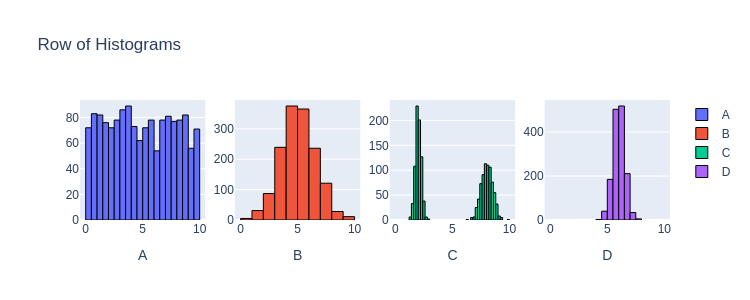

In [15]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig1 = make_subplots(rows=1, cols=4)

fig1.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig1.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig1.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig1.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig1.update_layout(height=300, width=750, title_text="Row of Histograms")
fig1.update_xaxes(title_text="A", row=1, col=1)
fig1.update_xaxes(title_text="B", row=1, col=2)
fig1.update_xaxes(title_text="C", row=1, col=3)
fig1.update_xaxes(title_text="D", row=1, col=4)
fig1.update_xaxes(range=[-0.5, 10.5])

for trace in fig1.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig1.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [5]:
means = [np.mean(data) for data in [data1, data2, data3, data4]]
variances = [np.var(data) for data in [data1, data2, data3, data4]]
setnames = 'ABCD'
for i, (mean, var) in enumerate(zip(means, variances), start=1):
    print(f"Dataset {setnames[i-1]}: Mean = {mean:.2f}, Variance = {var:.2f}")

Dataset A: Mean = 4.93, Variance = 8.67
Dataset B: Mean = 5.02, Variance = 2.38
Dataset C: Mean = 4.99, Variance = 9.15
Dataset D: Mean = 5.98, Variance = 0.26


### 4.1:
**A and C**

Based on the histograms it seems plausible that Dataset A, B and C have the same mean or similar means, they all seem to be around 5. Whereas in Dataset D it seems that the mean must be around 6 which is still close to 5, the variance seems to be the most similar between datasets A and C. A and C also have similar means.
### 4.2:
**(A and B) or (B and C)**

Dataset B has a similar mean to both Datasets A and C but has a completely different variance.
### 4.3:
**B and D**

Dataset D is the dataset with the most different mean from the rest of the datasets, the other 3 seem to have very similar means. Considering this, the closest variance to Dataset D's variance is Dataset B's. 
### 4.4:
**(A and D) or (C and D)**

Dataset D, again, is the dataset with the most different mean. The variance difference is the greatest between D and A as well as D and C.

### ChatGPT Link For 1-4: https://chatgpt.com/share/66f49126-9074-8003-b880-4c01de89b56c
###### SUMMARY BY CHATGPT:
"In our conversation, we discussed the pros and cons of three methods for visualizing data: histograms, box plots, and Kernel Density Estimations (KDEs).

#### Pros:
- **Histograms** are great for showing the frequency of data across bins and revealing trends.
- **Box plots** efficiently show key statistics such as quartiles, median, minimum/maximum, and outliers.
- **KDEs** provide a smooth estimation of the data’s distribution, making trends easy to visualize.

#### Cons:
- **Histograms** depend on bin choice, can look choppy, and lack detailed statistical info.
- **Box plots** don’t show the actual distribution or frequency, and many outliers can be difficult to represent.
- **KDEs** are sensitive to bandwidth, aren’t ideal for categorical data, and don’t give exact counts or frequencies.

Lastly, you mentioned that KDEs are your personal favorite because they help you interpret data better, though you acknowledged that the best method depends on the specific data and the goals of the analysis."

# 5:

When the data is right-skewed, the mean is greater than the median. The reason for this is that in right-skewed data the mode (peak of the curve) is shifted to the left, this means that there are more data sets on towards the left. Since medians are determined by looking at the middle value and most values are on the left side, the median is shifted to the left. The mean is determined by adding all values and dividing by the number of values, in this case the values on the right have more of a weight and a contribution towards the mean than they do in the median. When the data is left-skewed, the median is greater than the median for the same reasons but reversed.



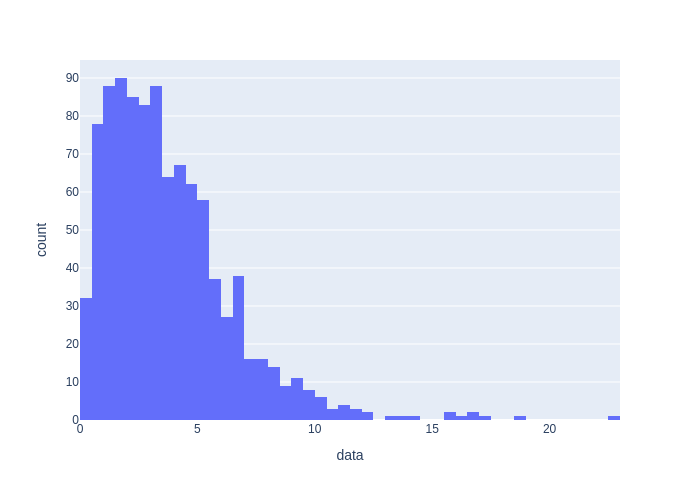

In [17]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig2 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
fig2.show(renderer="png")

### The code above does the following:
- Creates a random right-skewed sample set of values
- Creates a histogram of dataset to organize and visualize it (Although I added the last line that shows the graph)
- Determines the Mean and Median of the dataset
- Creates another random sample set of values, this time left-skewed

### ChatGPT Link For 5: https://chatgpt.com/share/66f4ddb1-89ec-8003-ab2a-b23352aabde2
###### SUMMARY BY CHATGPT:

"**Mean and Median Relationship:** In skewed distributions, the mean and median differ; in right-skewed distributions, the mean is greater than the median, while in left-skewed distributions, the mean is less than the median.

**Gamma Distribution:** The code generates random samples from a gamma distribution, which is inherently right-skewed when the shape parameter (a) is small (like a=2).

**Code Functionality:** The code generates two samples (sample1 and sample2), plots a histogram of sample1, calculates its mean and median, and creates a left-skewed distribution for sample2 by negating sample1.

**Skewness Confirmation:** The right skewness of sample1 is primarily determined by the shape parameter of the gamma distribution used in the code."

# 6:

In [7]:
medals = pd.read_csv("https://raw.githubusercontent.com/MainakRepositor/Datasets/refs/heads/master/Tokyo-Olympics/Medals.csv")
medals

,Team,Gold,Silver,Bronze,Total
0,Argentina,0,1,2,3
1,Armenia,0,2,2,4
2,Australia,17,7,22,46
3,Austria,1,1,5,7
4,Azerbaijan,0,3,4,7
...,...,...,...,...,...
88,Uganda,2,1,1,4
89,Ukraine,1,6,12,19
90,United States of America,39,41,33,113
91,Uzbekistan,3,0,2,5


In [29]:
# Top countries by gold medals
top_gold = medals.sort_values(by=medals.columns[1], ascending=False)
top_gold[['Team', 'Gold']]  # Assuming 'Gold' is the second column

,Team,Gold
90,United States of America,39
15,China,38
46,Japan,27
34,Great Britain,22
72,ROC,20
...,...,...
36,Grenada,0
71,Republic of Moldova,0
33,Ghana,0
55,Malaysia,0


In [28]:
# Top countries by silver medals
top_silver = medals.sort_values(by=medals.columns[2], ascending=False)
top_silver[['Team', 'Silver']]

,Team,Silver
90,United States of America,41
15,China,32
72,ROC,28
34,Great Britain,21
46,Japan,14
...,...,...
13,Burkina Faso,0
68,Puerto Rico,0
69,Qatar,0
10,Botswana,0


In [30]:
# Top countries by bronze medals
top_bronze = medals.sort_values(by=medals.columns[3], ascending=False)
top_bronze[['Team', 'Bronze']]

,Team,Bronze
90,United States of America,33
72,ROC,23
2,Australia,22
34,Great Britain,22
44,Italy,20
...,...,...
59,Namibia,0
58,Morocco,0
54,Lithuania,0
50,Kosovo,0


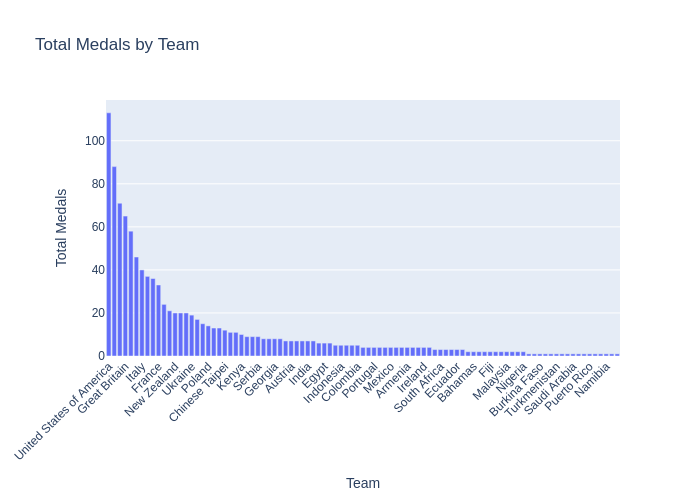

In [18]:
import plotly.express as px

medals_sorted = medals.sort_values(by='Total', ascending=False)
fig3 = px.bar(medals_sorted, x='Team', y='Total', title='Total Medals by Team')
fig3.update_layout(xaxis_title="Team", yaxis_title="Total Medals", xaxis_tickangle=-45)
fig3.show(renderer="png")

# 7:

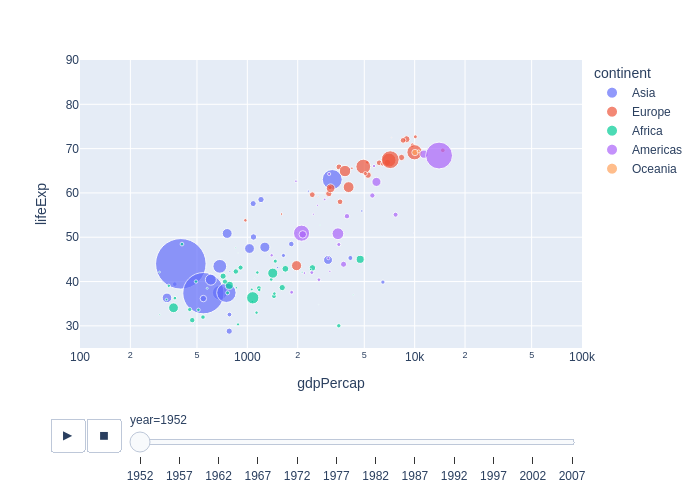

In [19]:
import plotly.express as px
df = px.data.gapminder()
fig4 = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
fig4.show(renderer="png")

# 8:

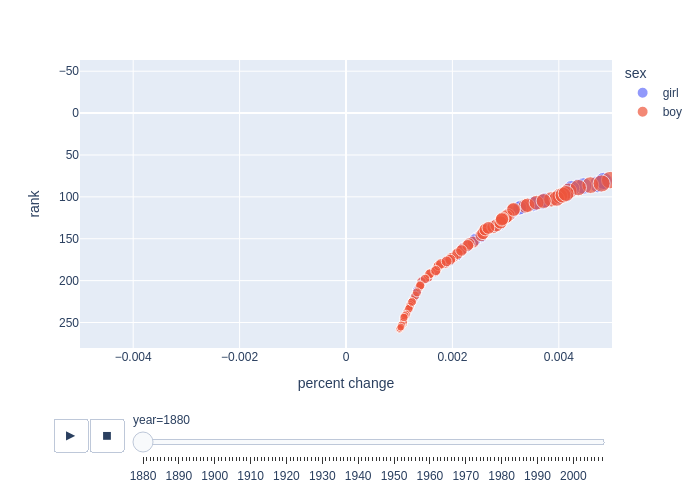

In [22]:
import pandas as pd
import plotly.express as px

bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

bn['name'] = bn['name'] + " " + bn['sex'] 
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name', 'year'])
bn['percent change'] = bn['percent'].diff()
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent > 0.001]

# Create the scatter plot
fig5 = px.scatter(bn, x="percent change", y="rank", animation_frame="year", 
                 animation_group="name", size="percent", color="sex", 
                 hover_name="name", size_max=50, range_x=[-0.005, 0.005])

fig5.update_yaxes(autorange='reversed')
fig5.show(renderer="png")


# 9: Yes